**Foreslået ændringer**  
    I denne notebook skal der nok kun foretages småændringer, så den er konsistent med resten. Vi skal lige overveje, om det giver mening at have disse kapitler sammen, eller om det skal splittes yderligere. Jeg tænker primært på, at man skal kunne finde rundt i Notebooks, så vi skal nok have en bedre titel end indledende og avanceret, så man kan finde ud af, om eksempelvis en invers matrix er i den ene eller i den anden. 

# Indledende Lineær Algebra

I denne notebook vil vi have fokus på hvordan man definerer, manipulerer og foretager forskellige udregninger med matricer og vektorer. Som altid starter vi med at importere de relevante moduler og aktiverer funktionen til visning af matematiske udtryk:

In [1]:
import sympy as sp                    # Importer sympy
from sympy import oo, pi, I           # Vi importerer uendelig, pi og den imaginære konstant I 
sp.init_printing()                    # Aktiver pretty-printing
from IPython.display import display   # Hent vores printer til matematiske udtryk

## Vektorer og matricer

Det grundlæggende er at definere matricer og vektorer på den nemmeste måde. Dette gøres ved at benytte den funktion, der hedder <code>Matrix()</code> fra SymPy. Da man oftest skal bruge denne mange gange, kan det være praktisk at importere den særskilt ved at skrive <code>from sympy import Matrix</code>, men det er lige så fint at skrive <code>sp.Matrix()</code>.

### Vektorer - definition og regneoperationer
Vektorer defineres ved at give en liste til Matrix funktionen. Vi kan altså skrive <code>Matrix([1, 1, 0])</code> for at få vektoren: 
$$\displaystyle \left[\begin{matrix}1\\1\\0\end{matrix}\right]$$



Vi kan angive de enkelte indgange som tal eller bruge symbolske variable som vi i forvejen har importeret fra _sympy.abc_ ligesom vi tidligere har gjort med $x$. 

Eksempel:

In [2]:
from sympy import Matrix
from sympy.abc import a, b, c

vektor1 = Matrix([a, b, c])
display(vektor1)

Det ligger os selvfølgelig også frit for at kombinere tal og variable:

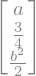

In [3]:
vektor2 = Matrix([a, sp.Rational(3, 4), b ** 2 / 2])   # Husk at bruge sp.Rational() til at definere brøker
display(vektor2)

De to vektorer <code>vektor</code> og <code>vektor2</code> kan nu kombineres på sædvanlig vis ved addition, subtraktion og skalarmultiplikation:

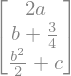

In [4]:
vektor1 + vektor2   # Blot læg de to vektorer sammen med et almindeligt +

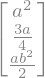

In [5]:
a * vektor2       # a er importeret som et symbol, så vi kan bruge det som en skalar

Hvis vi til gengæld forsøger at multiplicere de to vektorer får vi en fejl, da <code>*</code> mellem to Matrix-elementer er matrix-multiplikation, som ikke er defineret for to 3 x 1 matricer. Vi vender tilbage til matrixmultiplikation nedenfor, mens krydsprodukter (også kendt som vektor-produkter) må vente til den næste notebook om lineær algebra.

Et produkt, der derimod _er_ defineret for vektorer, er det fra gymnasiet velkendte skalarprodukt eller prikprodukt $\mathbf{v_1} \cdot \mathbf{v_2}$ som er et eksempel på et indre produkt (i Messers notation $\langle \mathbf{v_1}, \mathbf{v_2}\rangle$).

Et indre produkt mellem to vektorer <code>vektor1</code> og <code>vektor2</code> beregnes med <code>vektor1.dot(vektor2)</code>:

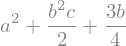

In [6]:
vektor1.dot(vektor2)

Som forventet får vi summen af produkterne af vektorens indgange, dog i en anden rækkefølge end vi normalt ville vælge ved udregning i hånden.

### Matricer - definition og regneoperationer

Matricer defineres på samme måde, som vi har gjort det med vektorer, altså ved at benytte <code>Matrix()</code>-funktionen. Når vi laver en matrix, så skal vi dog give en liste af rækker, der hver især selv er lister. Formatet er det samme, som man bruger til at lave arrays i numpy. Hvis man eksempelvis blot vil lave en tabel med indgange fra 1 til 9, skal man angive det som:

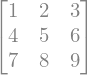

In [7]:
A = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
display(A)

Det er naturligvis en forudsætning, at alle rækkerne har lige mange elementer. 

Som for vektorer, kan vi benytte symboler i matricer:

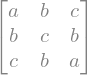

In [8]:
B = Matrix([[a, b, c], [b, c, b], [c, b, a]])
display(B)

Også addition og skalarmultiplikation fungerer som for vektorer:

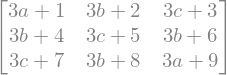

In [9]:
A + 3 * B

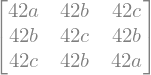

In [10]:
42*B

Matricer kan også multipliceres med hinanden (se Messer afsnit 5.1) så længe de har passende dimensioner. Man kan opfatte indgangen på plads (i,j) i produktet AB som prikproduktet af den i'te række i A med den j'te søjle i B, og for at dette kan lade sig gøre, skal antallet af søjler i A være det samme som antallet af rækker i B. Vi kan også skrive betingelsen som at hvis A er en matrix af dimension $m \times n$, skal B have dimension $n \times p$). I dette tilfælde kan vi gange dem sammen ved at benytte <code>*</code>:

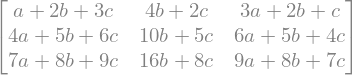

In [11]:
A * B

### Nogle indbyggede matricer: Identitets-, nul-, et- og diagonalmatricer
Til at definere en række meget almindeligt forekommende matricer er der indbygget smutveje.

Disse matricer skal importeres fra <code>sympy.matrices</code>.

__Identitetsmatricer:__ findes ved funktionen <code>eye(dimension)</code>. Navnet skyldes at "eye" udtales omtrent som "I", der ofte anvendes som symbol for identitetsmatricen, men allerede er reserveret til den imaginære enhed for komplekse tal. Da identitetsmatricen pr. definition er kvadratisk, angiver man blot dimensionen $n$ og får en $n\times n$ matrix med $1$ i diagonalen og $0$ alle andre steder:

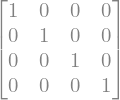

In [12]:
from sympy.matrices import eye

Id4 = eye(4)
display(Id4)

__0- og 1-matricer:__ Funktionerne <code>zeros(dimension)</code> og <code>ones(dimension)</code> giver en matrix af den ønskede størrelse fyldt med hhv. 0 eller 1-taller. Her kan <code>dimension</code> være to tal <code>n, m</code> eller et enkelt tal <code>n</code>, hvilket resulterer i en $n \times n$ matrix:

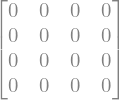

In [13]:
from sympy.matrices import zeros, ones

nul_matrix = zeros(4)
display(nul_matrix)

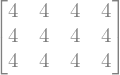

In [14]:
fire_matrix = 4 * ones(3, 4)
display(fire_matrix)

__Diagonalmatricer:__ laves med funktionen <code>diag(liste)</code>. Denne funktion giver man som input blot en liste med de ønskede diagonalelementer. Alle andre indgange er $0$:

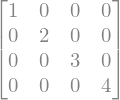

In [15]:
from sympy.matrices import diag

D = diag(1, 2, 3, 4)
display(D)

Man kan også indsætte matricer langs diagonalen i større maricer, således at man får en blok-diagonal-matrix. Man kan f.eks. indsætte en matrix, der beskriver en rotation i planen, i en større matrix, der beskriver samme rotation i $(x,y)$-planen indlejret i et tredimensionalt rum:

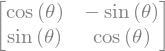

In [16]:
from sympy.abc import theta   # Importer theta

# Definer matrix
plan_rot = Matrix([[sp.cos(theta), sp.sin(-theta)], [sp.sin(theta), sp.cos(theta)]])
plan_rot

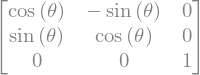

In [17]:
# Lav diagonal med et 1-tal og så en matrice. diag fylder nu 0 ud alle andre steder.
rum_rot = diag(plan_rot, 1)
rum_rot

Det er desuden muligt at sætte matricer sammen og definere matricer hvor hver indgang er resulatet af en beregning eller logisk test. [Disse metoder kan findes i dokumentationen her](https://docs.sympy.org/latest/modules/matrices/matrices.html) med vil sjældent være nødvendige i LinALys-kurset.

## Matrix-reduktion
Python/SymPy indeholder en række indbyggede metoder til at reducere matricer. Særligt brugbart i LinALys er funktionen, der bringer en matrix på reduceret række-echelonform. For en matrix $A$ kan vi finde den ækvivalente matrix på reduceret række-echelonform ved <code>.rref()</code>:

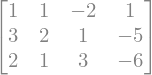

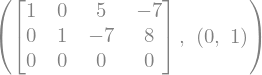

In [18]:
A = Matrix([[1, 1, -2, 1], [3, 2, 1, -5], [2, 1, 3, -6]])
display(A)
A.rref()

Resultatet er den reducerede række-echelonform og en liste over nummeret på de kolonner, der har en ledende indgang. Hvis man vil udelade denne liste, kan man i stedet skrive <code>.rref(pivots = False)</code>.

## Ligningssystemer med een løsning

Som det nok er gået op for de fleste, anviser lineær algebra en effektiv måde til at bestemme løsningerne til lineære ligningssystemer ved hjælpe af matrixregning. Vi kan f.eks. omskrive:

\begin{align*} 
    x_1 + 3 x_3 &= 20 \\ 4x_2 + 6 x_3 &= 74 \\ 3 x_1 + 6x_2 + 11 x_3 &= 136
\end{align*}

til:

\begin{equation*}
    \displaystyle \left[\begin{matrix}1 & 0 & 3\\0 & 4 & 6\\3 & 6 & 11\end{matrix}\right] \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = \displaystyle \left[\begin{matrix}20\\74\\136\end{matrix}\right]
\end{equation*}

Når vi har et ligningssystem på denne form, og der findes en entydig løsning, kan vi uden videre beregne løsningen med SymPy. Vi benytter blot <code>LUsolve</code>-metoden på en matrix, og giver den højre side af vores ligningssystem som inputparameter:

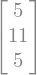

In [19]:
#Definerer her matrix A og vektor b
A = Matrix([[1, 0, 3], [0, 4, 6], [3, 6, 11]])
b = Matrix([20, 74, 136])

#Løsningen findes nu blot ved:
sol = A.LUsolve(b)
display(sol)

Skulle vi være mistroiske overfor moderne datamater, kan vi nu verificere at 

\begin{equation*}
    \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = \displaystyle \left[\begin{matrix}5 \\11\\5\end{matrix}\right]
\end{equation*}

virkelig er en løsning ved at multiplicere matricen $A$ med løsningsvektoren:

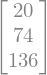

In [20]:
A * sol

Vi kan lave tilsvarende operationer med symbolske variable. Lad $A$ være matricen angivet ovenfor, men i stedet ønsker vi nu at finde en generel løsning til 

\begin{equation*}
    \displaystyle \left[\begin{matrix}1 & 0 & 3\\0 & 4 & 6\\3 & 6 & 11\end{matrix}\right] \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = \displaystyle \left[\begin{matrix}d\\e\\f\end{matrix}\right]
\end{equation*}

## Omvendte/inverse matricer
Som beskrevet i Messer afsnit 5.2 kan matricer inverteres. Dette gøres meget simpelt for en matrix $A$ med syntaksen <code>A.inv()</code>:

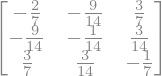

In [21]:
A.inv()

Såfremt den omvendte/inverse matrix for $A$ eksisterer, kan vi derfor også løse det ovenstående ligningssystem som

\begin{equation*}
    \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = 
    \displaystyle \left[\begin{matrix}1 & 0 & 3\\0 & 4 & 6\\3 & 6 & 11\end{matrix}\right]^{-1}
    \displaystyle \left[\begin{matrix}d\\e\\f\end{matrix}\right]
\end{equation*}

hvilket i Python-syntax gøres ved

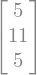

In [22]:
A.inv()*b

## Matrixrang 
Bemærk at hverken man hverken kan finde løsninger med <code>LUsolve</code> eller ved at beregne den inverse matrix hvis  ikke ligningssystemet har netop én løsning (dvs. hvis ligningerne i ligningssystemet har indbygget en modstrid eller løsningen har en eller flere frie variable). I disse tilfælde vil begge metoder give fejlmeddelelser.

Årsagen hertil er at koefficientmatricen ikke har fuld rang. Rangen for en matrix $A$ kan findes ved <code>A.rank()</code>, og angiver antallet af ledende et-taller i den matrix, der fremkommer ved at føre $A$ på reduceret række-echelonform.

Af denne grund, og i overensstemmelse med Messer sætning 5.12, er det derfor ingen overraskelse at se at $A$ fra overfor, der repræsenterer 3 lineært uafgængige ligninger med 3 ubekendte, har rang 3:

In [23]:
A.rank()

## Ligningssystemer med flere løsninger: frie parametre
Vi kommer dog ofte ud for ligningssystemer med flere ubekendte end der er lineært uafhængige ligninger, svarende til at løsningen kan parametriseres med et antal fri variable/parametre. Dette svarer til at rangen af den tilsvarende koefficientmatrix $A$ er mindre end antallet af variable i ligningssystemet.
I sådanne tilfælde er A ikke invertibel og <code>LU-solve</code> vil derfor ikke virke.

Eksempel: Vi vil gerne finde den fuldstændige løsning til 
\begin{equation*}
    \displaystyle \left[\begin{matrix}1 & 0 & 3 & 1\\0 & 4 & 6 & 1\\-1 & 4 & 3 & 0\end{matrix}\right] \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\end{matrix}\right] = \displaystyle \left[\begin{matrix}0\\0\\0\end{matrix}\right]
\end{equation*}

En mulighed er at føre $A$ på reduceret række-echelonform:

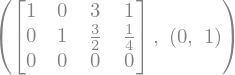

In [25]:
A = Matrix([[1, 0, 3, 1], [0, 4, 6, 1], [-1, 4, 3, 0]])
A.rref()

Vi sætter $x_3 = r$ og $x_4 = s$ da der ikke er ledende indgange i 3. og 4. kolonne. Herefter opskriver vi løsningen som
\begin{equation*}
    \displaystyle \left[\begin{matrix}x_{1}\\x_{2}\\x_{3}\\x_4\end{matrix}\right] = 
    \displaystyle \left[\begin{matrix}-3\\-\frac32\\1\\0\end{matrix}\right]\cdot r +
    \displaystyle \left[\begin{matrix}-1\\-\frac14\\0\\1\end{matrix}\right]\cdot s, \hspace{1cm}r,s\in {\rm I\!R}
\end{equation*}

Men vi kan også benytte metoden <code>.gauss_jordan_solve()</code> som efterligner denne metode, blot med en lidt anden typografi:

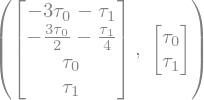

In [27]:
b = Matrix([0, 0, 0])
A.gauss_jordan_solve(b)